<a href="https://colab.research.google.com/github/Mal56ik/AI-ML-in-drug-discovery/blob/main/Drug_Discovery_using_ML_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installation of python libraries

In [6]:
pip install rdkit pandas scikit-learn seaborn matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 52.2 MB/s eta 0:00:00


# import libraries

In [7]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# import data in CSV

In [8]:
path = "/content/drive/MyDrive/Research work/csv of all data/canonicalsmiles.docking.excel.purify.csv"

In [9]:
path2 = "/content/canonicalsmiles.docking.excel.purify.csv"

# read the CSV file

In [10]:
df1 = pd.read_csv(path)

In [11]:
df1

,smiles
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O
...,...
2361,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1
2363,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O


In [12]:
smiles_list = df1["smiles"].tolist()

In [13]:
smiles_list

['CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O',
 'O=C(CCC(=O)N1CCCC1C(=O)O)NO',
 'C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
 'NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
 'CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O',
 'C[C@@H](CCC(=O)O)C(=O)N1CCCC1C(=O)O',
 'C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
 'O=C(NC(Cc1ccccc1)C(=O)CCC(=O)N1CCCC1c1nn[nH]n1)c1ccccc1',
 'CC(=O)SCC1CCCN(CC(=O)O)C1=O',
 'O=C(O)CN1CCC(CS)C1=O',
 'CC(=O)SCC1CCCN(C(C(=O)O)c2ccccc2)C1=O',
 'O=C(NC(Cc1ccccc1)C(=O)CCC(=O)N1CCCC1P(=O)(O)O)c1ccccc1',
 'CC(=O)SCC1CCCN(C(C)C(=O)O)C1=O',
 'C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O',
 'CCCCC(CC(=O)NO)[S+]([O-])c1ccccc1',
 'CCCC[C@H](CC(=O)NO)S(=O)(=O)c1ccccc1',
 'CCCCC(CC(=O)NO)S(=O)(=O)c1ccccc1',
 'CCCC[C@@H](CC(=O)NO)S(=O)(=O)c1ccccc1',
 'O=C(NC(Cc1ccccc1)C(=O)CCC(=O)N1CCC[C@H]1C(=O)O)c1ccccc1',
 'O=C(O)CN1CCCC(CS)C1=O',
 'CC(=O)SCC1CCN(CC(=O)O)C1=O',
 'CCCC(C(=O)O)N1CCCC(CSC(C)=O)C1=O',
 'O=C(NC(Cc1ccccc1)C(=O)CCC(=O)N1CCCC1C(=O)NO)c1ccccc1',
 'NCCCCC(NC(=O)C1CCC

# calculate molecular descriptor

In [14]:
def calc_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            "MolWt": Descriptors.MolWt(mol),
            "TPSA": Descriptors.TPSA(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHDonors": Descriptors.NumHDonors(mol),
            "NumHAcceptors": Descriptors.NumHAcceptors(mol),
        }
    else:
        return None


In [15]:
features = [calc_descriptors(smi) for smi in smiles_list]
df2 = pd.DataFrame(features)

In [16]:
# Step 4: Dummy IC50 model (replace this later with a real trained model)
dummy_ic50 = df2["MolWt"] * 0.1 + np.random.normal(0, 1, len(df2))
model = LinearRegression().fit(df2[["MolWt", "TPSA", "LogP", "NumHDonors", "NumHAcceptors"]], dummy_ic50)



# predict IC50 based on descriptors

In [17]:
# Step 5: Predict IC50
df2["predicted_IC50"] = model.predict(df2[["MolWt", "TPSA", "LogP", "NumHDonors", "NumHAcceptors"]])




In [18]:
# Only show SMILES and predicted IC50
df2["smiles"] = df1["smiles"]
print(df2[["smiles", "predicted_IC50"]])

                                                 smiles  predicted_IC50
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O       25.835342
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO       23.041012
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O       24.433092
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...       40.554252
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O       24.354313
...                                                 ...             ...
2361           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1       38.114819
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1       38.660882
2363  C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...       30.890801
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O       28.056115
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...       35.600291

[2366 rows x 2 columns]


In [19]:
df2.to_csv('predicted_IC50(3).csv', index=False)

In [20]:
import pandas as pd

# Read the CSV file containing 7 columns data

In [21]:
df2 = pd.read_csv("/content/drive/MyDrive/Research work/csv of all data/predicted_IC50.csv")


In [22]:
df2

,MolWt,TPSA,LogP,NumHDonors,NumHAcceptors,predicted_IC50,smiles
0,258.274,106.94,-0.4868,3,4,25.891747,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O
1,230.220,106.94,-0.6524,3,4,23.099842,O=C(CCC(=O)N1CCCC1C(=O)O)NO
2,244.247,106.94,-0.8753,3,4,24.496630,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O
3,405.495,132.96,1.2352,4,5,40.582439,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...
4,243.259,94.91,0.5629,2,3,24.350792,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O
...,...,...,...,...,...,...,...
2361,380.864,75.62,5.1357,2,7,38.089450,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1
2362,386.912,74.76,4.1610,3,7,38.726325,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1
2363,308.356,146.79,-1.3976,4,6,30.932114,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...
2364,280.261,129.72,0.1786,4,4,28.107544,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O


In [23]:
# prompt: asa code likho key upr datafram mey smiles column first mey aa jayey

# Move the 'smiles' column to the first position
cols = list(df2.columns)
cols.insert(0, cols.pop(cols.index('smiles')))
df2 = df2.loc[:, cols]
df2


,smiles,MolWt,TPSA,LogP,NumHDonors,NumHAcceptors,predicted_IC50
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,258.274,106.94,-0.4868,3,4,25.891747
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO,230.220,106.94,-0.6524,3,4,23.099842
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,244.247,106.94,-0.8753,3,4,24.496630
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,405.495,132.96,1.2352,4,5,40.582439
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,243.259,94.91,0.5629,2,3,24.350792
...,...,...,...,...,...,...,...
2361,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1,380.864,75.62,5.1357,2,7,38.089450
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1,386.912,74.76,4.1610,3,7,38.726325
2363,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...,308.356,146.79,-1.3976,4,6,30.932114
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O,280.261,129.72,0.1786,4,4,28.107544


In [24]:
df2.to_csv('smiles_first.csv' , index=False)

# bioactivity class

In [25]:
def classify_ic50(ic50):
    if ic50 >= 10000:
        return "inactive"
    elif ic50 <= 1000:
        return "active"
    else:
        return "intermediate"


In [26]:
df2["bioactivity_class"] = df2["predicted_IC50"].apply(classify_ic50)


In [27]:
df2

,smiles,MolWt,TPSA,LogP,NumHDonors,NumHAcceptors,predicted_IC50,bioactivity_class
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,258.274,106.94,-0.4868,3,4,25.891747,active
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO,230.220,106.94,-0.6524,3,4,23.099842,active
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,244.247,106.94,-0.8753,3,4,24.496630,active
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,405.495,132.96,1.2352,4,5,40.582439,active
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,243.259,94.91,0.5629,2,3,24.350792,active
...,...,...,...,...,...,...,...,...
2361,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1,380.864,75.62,5.1357,2,7,38.089450,active
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1,386.912,74.76,4.1610,3,7,38.726325,active
2363,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...,308.356,146.79,-1.3976,4,6,30.932114,active
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O,280.261,129.72,0.1786,4,4,28.107544,active


In [28]:
df2.to_csv("bioactivity,IC50.all.csv", index=False)


# predict IC50 in molar

In [29]:
df2["IC50_M"] = df2["predicted_IC50"] * 1e-9

# predict PIC50 from IC50_M

In [30]:
df2["pIC50"] = -np.log10(df2["IC50_M"])

In [31]:
print(df2[["smiles","MolWt","TPSA","LogP","NumHDonors","NumHAcceptors","predicted_IC50","bioactivity_class", "IC50_M", "pIC50"]])

                                                 smiles    MolWt    TPSA  \
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O  258.274  106.94   
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO  230.220  106.94   
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O  244.247  106.94   
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...  405.495  132.96   
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O  243.259   94.91   
...                                                 ...      ...     ...   
2361           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1  380.864   75.62   
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1  386.912   74.76   
2363  C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...  308.356  146.79   
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O  280.261  129.72   
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...  356.466   58.64   

        LogP  NumHDonors  NumHAcceptors  predicted_IC50 bioactivity_class  \
0    -0.48

# save the cvs file

In [32]:
df2.to_csv("2366rows,10columns.csv",index=False)

# drop null values again from smiles column

In [33]:
df2= df2.dropna(subset=['smiles'])

In [34]:
df2

,smiles,MolWt,TPSA,LogP,NumHDonors,NumHAcceptors,predicted_IC50,bioactivity_class,IC50_M,pIC50
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,258.274,106.94,-0.4868,3,4,25.891747,active,2.589175e-08,7.586839
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO,230.220,106.94,-0.6524,3,4,23.099842,active,2.309984e-08,7.636391
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,244.247,106.94,-0.8753,3,4,24.496630,active,2.449663e-08,7.610894
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,405.495,132.96,1.2352,4,5,40.582439,active,4.058244e-08,7.391662
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,243.259,94.91,0.5629,2,3,24.350792,active,2.435079e-08,7.613487
...,...,...,...,...,...,...,...,...,...,...
2361,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1,380.864,75.62,5.1357,2,7,38.089450,active,3.808945e-08,7.419195
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1,386.912,74.76,4.1610,3,7,38.726325,active,3.872633e-08,7.411994
2363,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...,308.356,146.79,-1.3976,4,6,30.932114,active,3.093211e-08,7.509590
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O,280.261,129.72,0.1786,4,4,28.107544,active,2.810754e-08,7.551177


# install conda

In [35]:
# prompt: write code to install conda

!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda update -n base -c defaults conda
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2025-05-09 00:44:58--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 148.27M   149MB/s    in 1.0s    

2025-05-09 00:44:59 (149 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [155472915/155472915]

PREFIX=/usr/local
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the fi

# check version

In [36]:
# prompt: check version of conda

!conda --version


conda 25.3.1


In [37]:
# prompt: asa code likho key jis sey csv file sey mw 500 greater na ho .LOGP greater then 5 HD greater then 5 HA greter then 10 and TPSA value <=140

import pandas as pd

# Load the dataframe (replace with your actual file path)
df2 = pd.read_csv("2366rows,10columns.csv")

# Apply filters
filtered_df = df2[
    (df2["MolWt"] <= 500)
    & (df2["LogP"] <= 5)
    & (df2["NumHDonors"] <= 5)
    & (df2["NumHAcceptors"] <= 10)
    & (df2["TPSA"] <= 140)
]

# Display or save the filtered dataframe
print(filtered_df)
# Save to a new CSV file
filtered_df.to_csv("filtered_compounds.csv", index=False)


                                                 smiles    MolWt    TPSA  \
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O  258.274  106.94   
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO  230.220  106.94   
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O  244.247  106.94   
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...  405.495  132.96   
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O  243.259   94.91   
...                                                 ...      ...     ...   
2316  COc1cnc(Nc2ccc(N3CCN(C)CC3)cn2)nc1Nc1cccc(C(F)...  459.476   78.44   
2321  CN1CCN(c2ccc(Nc3ncc(Cl)c(Oc4cccc(C(F)(F)F)c4)n...  464.879   66.41   
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1  386.912   74.76   
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O  280.261  129.72   
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...  356.466   58.64   

        LogP  NumHDonors  NumHAcceptors  predicted_IC50 bioactivity_class  \
0    -0.48

In [38]:
filtered_df

,smiles,MolWt,TPSA,LogP,NumHDonors,NumHAcceptors,predicted_IC50,bioactivity_class,IC50_M,pIC50
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,258.274,106.94,-0.4868,3,4,25.891747,active,2.589175e-08,7.586839
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO,230.220,106.94,-0.6524,3,4,23.099842,active,2.309984e-08,7.636391
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,244.247,106.94,-0.8753,3,4,24.496630,active,2.449663e-08,7.610894
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,405.495,132.96,1.2352,4,5,40.582439,active,4.058244e-08,7.391662
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,243.259,94.91,0.5629,2,3,24.350792,active,2.435079e-08,7.613487
...,...,...,...,...,...,...,...,...,...,...
2316,COc1cnc(Nc2ccc(N3CCN(C)CC3)cn2)nc1Nc1cccc(C(F)...,459.476,78.44,4.1380,2,8,45.929487,active,4.592949e-08,7.337908
2321,CN1CCN(c2ccc(Nc3ncc(Cl)c(Oc4cccc(C(F)(F)F)c4)n...,464.879,66.41,4.8315,1,7,46.421813,active,4.642181e-08,7.333278
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1,386.912,74.76,4.1610,3,7,38.726325,active,3.872633e-08,7.411994
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O,280.261,129.72,0.1786,4,4,28.107544,active,2.810754e-08,7.551177


In [39]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [40]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [41]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
    baseData = np.arange(1, 1)  # Initialize baseData outside the loop
    i = 0  # Initialize i outside the loop
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    return descriptors

# Assuming df1 is your DataFrame containing the 'smiles' column
smiles_list = df1["smiles"].tolist()  # Get the list of SMILES strings

# Call the lipinski function with the smiles_list
lipinski_df = lipinski(smiles_list)

# Print the resulting DataFrame
print(lipinski_df)

           MW    LogP  NumHDonors  NumHAcceptors
0     258.274 -0.4868         3.0            4.0
1     230.220 -0.6524         3.0            4.0
2     244.247 -0.8753         3.0            4.0
3     405.495  1.2352         4.0            5.0
4     243.259  0.5629         2.0            3.0
...       ...     ...         ...            ...
2361  380.864  5.1357         2.0            7.0
2362  386.912  4.1610         3.0            7.0
2363  308.356 -1.3976         4.0            6.0
2364  280.261  0.1786         4.0            4.0
2365  356.466  2.8434         1.0            3.0

[2366 rows x 4 columns]


In [42]:
lipinski_df.to_csv("Lipinski.csv", index=False)

In [43]:
df1 = pd.read_csv(path)

In [44]:
df1

,smiles
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O
...,...
2361,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1
2363,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O


In [45]:
# prompt: write code and combined data from df1 and lipinski_df

# Combine the dataframes
combined_df = pd.concat([df1, lipinski_df], axis=1)

# Print the combined dataframe
combined_df


,smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,258.274,-0.4868,3.0,4.0
1,O=C(CCC(=O)N1CCCC1C(=O)O)NO,230.220,-0.6524,3.0,4.0
2,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,244.247,-0.8753,3.0,4.0
3,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,405.495,1.2352,4.0,5.0
4,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,243.259,0.5629,2.0,3.0
...,...,...,...,...,...
2361,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1,380.864,5.1357,2.0,7.0
2362,Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1,386.912,4.1610,3.0,7.0
2363,C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...,308.356,-1.3976,4.0,6.0
2364,CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O,280.261,0.1786,4.0,4.0


In [46]:
combined_df.to_csv("2366R&5C.csv", index=False)

In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [52]:
dummy_ic50 = combined_df["MW"] * 0.1 + np.random.normal(0, 1, len(df2))
model = LinearRegression().fit(combined_df[["MW", "LogP", "NumHDonors", "NumHAcceptors"]], dummy_ic50)

In [53]:
combined_df["predicted_IC50"] = model.predict(combined_df[["MW",  "LogP", "NumHDonors", "NumHAcceptors"]])

In [54]:
combined_df["smiles"] = df1["smiles"]
print(combined_df[["smiles", "predicted_IC50"]])

                                                 smiles  predicted_IC50
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O       25.797601
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO       22.998670
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O       24.393467
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...       40.516016
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O       24.299709
...                                                 ...             ...
2361           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1       38.158315
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1       38.745426
2363  C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...       30.811168
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O       27.998545
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...       35.619790

[2366 rows x 2 columns]


In [55]:
# prompt: predict PIC50 from IC50

# Assuming 'combined_df' is your DataFrame with 'predicted_IC50' column
# Calculate IC50 in molar and pIC50
combined_df["IC50_M"] = combined_df["predicted_IC50"] * 1e-9
combined_df["pIC50"] = -np.log10(combined_df["IC50_M"])

# Print the relevant columns
print(combined_df[["smiles", "MW", "LogP", "NumHDonors", "NumHAcceptors", "predicted_IC50", "IC50_M", "pIC50"]])

# Save the updated DataFrame to a new CSV file
combined_df.to_csv("final_predictions.csv", index=False)


                                                 smiles       MW    LogP  \
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O  258.274 -0.4868   
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO  230.220 -0.6524   
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O  244.247 -0.8753   
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...  405.495  1.2352   
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O  243.259  0.5629   
...                                                 ...      ...     ...   
2361           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1  380.864  5.1357   
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1  386.912  4.1610   
2363  C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...  308.356 -1.3976   
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O  280.261  0.1786   
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...  356.466  2.8434   

      NumHDonors  NumHAcceptors  predicted_IC50        IC50_M     pIC50  
0            

In [56]:
# prompt: check negative log

# Check for negative pIC50 values and handle them
combined_df.loc[combined_df["pIC50"] < 0, "pIC50"] = 0

print(combined_df[["smiles", "MW", "LogP", "NumHDonors", "NumHAcceptors", "predicted_IC50", "IC50_M", "pIC50"]])

# Save the updated DataFrame to a new CSV file
combined_df.to_csv("final_predictions.csv", index=False)


                                                 smiles       MW    LogP  \
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O  258.274 -0.4868   
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO  230.220 -0.6524   
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O  244.247 -0.8753   
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...  405.495  1.2352   
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O  243.259  0.5629   
...                                                 ...      ...     ...   
2361           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1  380.864  5.1357   
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1  386.912  4.1610   
2363  C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...  308.356 -1.3976   
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O  280.261  0.1786   
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...  356.466  2.8434   

      NumHDonors  NumHAcceptors  predicted_IC50        IC50_M     pIC50  
0            

In [58]:
# prompt: predict bioactivity class of above combined_df files

# Assuming 'combined_df' is your DataFrame with 'predicted_IC50' column
# and you have already calculated IC50_M and pIC50

def classify_ic50(ic50):
    if ic50 >= 10000:
        return "inactive"
    elif ic50 <= 1000:
        return "active"
    else:
        return "intermediate"

combined_df["bioactivity_class"] = combined_df["predicted_IC50"].apply(classify_ic50)

print(combined_df[["smiles", "MW", "LogP", "NumHDonors", "NumHAcceptors", "predicted_IC50", "IC50_M", "pIC50", "bioactivity_class"]])

# Save the updated DataFrame to a new CSV file
combined_df.to_csv("final_predictions_with_class.csv", index=False)


                                                 smiles       MW    LogP  \
0             CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O  258.274 -0.4868   
1                           O=C(CCC(=O)N1CCCC1C(=O)O)NO  230.220 -0.6524   
2               C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O  244.247 -0.8753   
3     NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...  405.495  1.2352   
4                        CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O  243.259  0.5629   
...                                                 ...      ...     ...   
2361           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1Nc1ccccn1  380.864  5.1357   
2362           Clc1cnc(Nc2ccc(-c3ccsc3)cn2)nc1NC1CCNCC1  386.912  4.1610   
2363  C[C@@H](O)[C@H](N)C(=O)N[C@@H](/C=C/S(C)(=O)=O...  308.356 -1.3976   
2364                  CC(C)CC(NC(=O)CN)P(=O)(O)CCC(=O)O  280.261  0.1786   
2365  CC[C@@H](/C=C/C(=O)N1CCc2ccccc21)NC(=O)C1(C)CC...  356.466  2.8434   

      NumHDonors  NumHAcceptors  predicted_IC50        IC50_M     pIC50  \
0           

In [60]:
# Check if only 'active' compounds exist in the 'bioactivity_class' column
only_active = all(x == "active" for x in df2["bioactivity_class"])

if only_active:
  print("The bioactivity class contains only 'active' compounds.")
else:
  print("The bioactivity class contains compounds other than 'active'.")

# Count the occurrences of each bioactivity class
bioactivity_counts = df2["bioactivity_class"].value_counts()
print("\nBioactivity Class Counts:\n", bioactivity_counts)


The bioactivity class contains only 'active' compounds.

Bioactivity Class Counts:
 bioactivity_class
active    2366
Name: count, dtype: int64


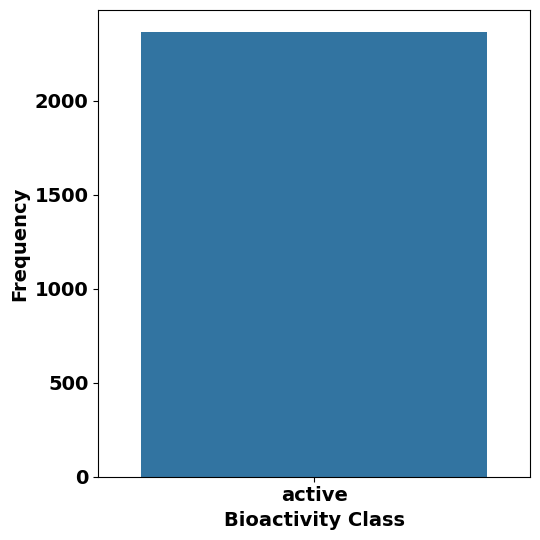

In [69]:
# prompt: frequency plot size of figure is 5.5 height and width , plot frequency in y and bioactivity class in x asis font size is 14 text weight BOLD hona hey

import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df5 = pd.read_csv("/content/final_predictions_with_class.csv")  # Replace with the actual file name

# Create the frequency plot
plt.figure(figsize=(5.5, 5.5))  # Set figure size
sns.countplot(x='bioactivity_class', data=df2)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('frequency_plot.pdf')
plt.show()


In [66]:
# prompt: save above fig

plt.savefig('my_figure.1.pdf') #Example. Change file extension as needed.


<Figure size 640x480 with 0 Axes>

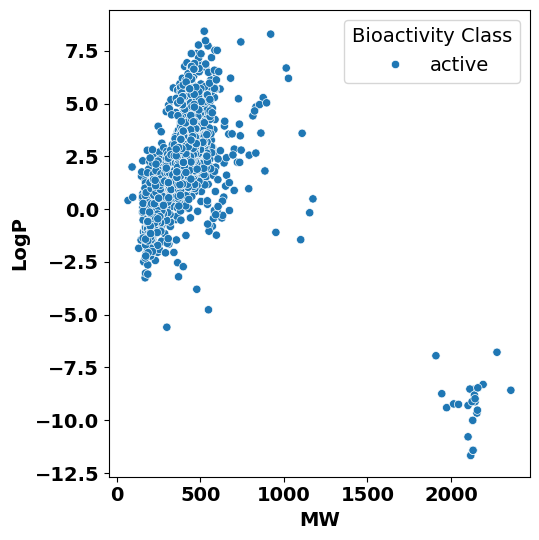

In [62]:
# prompt: plot scatter mw vs logp, (5.5/5.5) all graphs created in seaborn , scatter plot mey xaxis mey mw, and y axis mey logP same size , give legends(label colour) save all the diagrams plot matplotlib

# Create the scatter plot
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=combined_df, hue='bioactivity_class')
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.legend(fontsize=14, title='Bioactivity Class', title_fontsize=14) # Added legend
plt.tight_layout()
plt.savefig('scatter_mw_vs_logp.pdf')
plt.show()



In [72]:
# prompt: save the above fig as fig2

plt.savefig('fig2.png')


<Figure size 640x480 with 0 Axes>

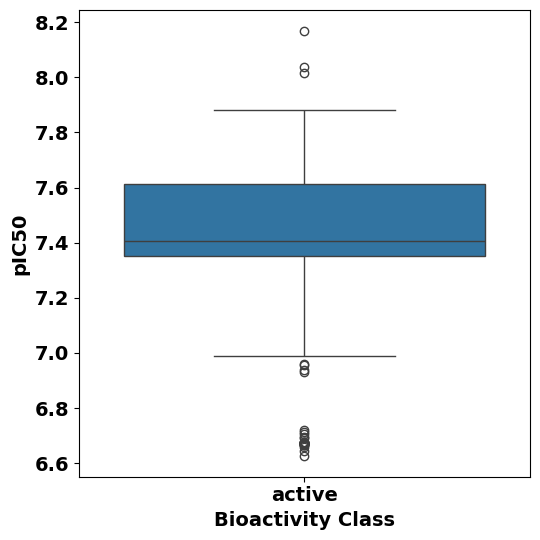

In [63]:
# prompt: third plot is bOX plot make for PIC50 xaxis bioactivity class , and y axis PIC50 value two box created in one graph,

import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df5 = pd.read_csv("/content/final_predictions_with_class.csv")  # Replace with the actual file name

# Create the box plot
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='pIC50', data=df5)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('box_plot_pic50.pdf')
plt.show()


In [71]:
# prompt: save the fig 3 as pdf

plt.savefig('fig3.png')


<Figure size 640x480 with 0 Axes>

canonical smiles ko bi remove kro null  remove kro pandas mye data load krna hey . conda install krna hey version check krna hey . mw 500 greater na ho .LOGP greater then 5 HD greater then 5 HA greter then 10,                      rdkit sey hum ney  kim ,then rdkit.kim sey descriptor, lipinski install krien gey . descriptor calculation function sir send krien gey .    then combine smiles ka data r lipinski descriptor sey jo data ayey ga un ko combine krna hey .Convert again IC50 to PIc50, check negative log csv , then chemical space analysis , frequency plot size of figure is 5.5 height and width , plot frequency in y and bioactivity class in x asis font size is 14 text weight BOLD hona hey , plot scatter mw vs logp, (5.5/5.5) all graphs created in seaborn , scatter plot mey xaxis mey mw, and y axis mey logP same size , give legends(label colour) save all the diagrams plot matplotlib.save fig .pdf .third plot is bOX plot make for PIC50 xaxis bioactivity class , and y axis PIC50 value two box created in one graph,               Mannyhiting u h test (stastical test )